In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
mhs = pd.read_csv("https://raw.githubusercontent.com/DiahDSyntia/datamining-tugasakhir/main/indian_liver_patient.csv")
mhs.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [3]:
mhs['Dataset'].unique()

array([1, 2])

In [4]:
X=mhs.iloc[:,0:10].values
y=mhs.iloc[:,10].values

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[107  15]
 [ 41  11]]
accuracy_random_Forest : 0.678
precision_random_Forest : 0.678
recall_random_Forest : 0.678
f1-score_random_Forest : 0.678


In [8]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[91 31]
 [39 13]]
accuracy_KNN : 0.598
precision_KNN : 0.598
recall_KNN: 0.598
f1-score_KNN : 0.598


In [9]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[42 80]
 [ 2 50]]
accuracy_Naive Bayes: 0.529
precision_Naive Bayes: 0.529
recall_Naive Bayes: 0.529
f1-score_Naive Bayes : 0.529


In [10]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[88 34]
 [34 18]]
accuracy_DecisionTree: 0.609
precision_DecisionTree: 0.609
recall_DecisionTree: 0.609
f1-score_DecisionTree : 0.609


In [11]:
results = pd.DataFrame({
    'Model': [ 'KNN', 
              'Random Forest',
              'Naive Bayes',
              'Decision Tree'],
    'Score': [ acc_knn,
              acc_random_forest,
              acc_gaussian,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score
0,Random Forest,100.00,67.82
1,Decision Tree,100.00,60.92
2,KNN,82.47,59.77
3,Naive Bayes,55.56,52.87


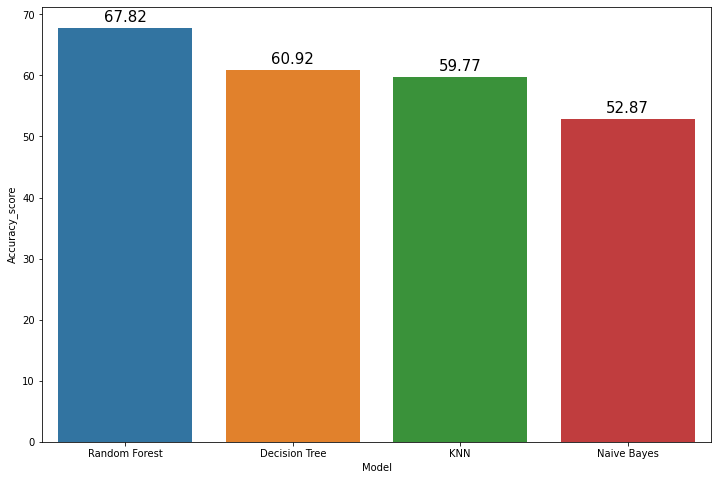

In [12]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

In [22]:
X_new = np.array([[46,	1,	1.8,	0.7,	208,	19,	14,	7.6,	4.4,	1.30]])
prediksi = decision_tree.predict(X_new)
print (prediksi)

[0]


In [21]:
X_new = np.array([[46,	1,	1.8,	0.7,	208,	19,	14,	7.6,	4.4,	1.30]])
prediksi = knn.predict(X_new)
print (prediksi)

[0]


In [20]:
X_new = np.array([[46,	1,	1.8,	0.7,	208,	19,	14,	7.6,	4.4,	1.30]])
prediksi = random_forest.predict(X_new)
print (prediksi)

[0]


In [23]:
X_new = np.array([[46,	1,	1.8,	0.7,	208,	19,	14,	7.6,	4.4,	1.30]])
prediksi = gaussian.predict(X_new)
print (prediksi)

[1]
